- you can test each algorithm on each dataset by excuting the corresponding section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../utils/')
import imp
import plot_tools
imp.reload(plot_tools)
import pandas as pd
import networkx as nx
from measures import measures_calculator,matchY

import api
imp.reload(api)

<module 'api' from '../utils/api.py'>

In [2]:
class DataLoader:
    def __init__(self):
        pass
    
    @classmethod
    def load(self,name):
        if name== 'iris':
            df=pd.read_csv('./real_data/iris.csv', header=None)
            X=df.iloc[1:,:-1].values.astype(np.float)
            Y_true=df.iloc[1:,-1].values.astype(np.float)
            return X,Y_true
        
        if name=='wine':
            df = pd.read_csv('./real_data/wine.csv', header=None)
            X = df.iloc[1:,:-1].values.astype(np.float)
            Y_true = df.iloc[1:,-1].values.astype(np.int)
            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true
        
        if name=='glass':
            df = pd.read_csv('./real_data/glass.csv', header=0)
            X = df.iloc[:,:-1].values.astype(np.float)
            Y_true = df.iloc[:,-1].values.astype(np.int)
            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true
        
        if name=='breast cancer':
            df = pd.read_csv('./real_data/wdbc.data', header=None)
            X = df.iloc[:,2:].values.astype(np.float)
            Y_true = df.iloc[:,1]

            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true
        
        if name=='hepatitis':
            df = pd.read_csv('./real_data/hepatitis.data', header=None)
            df.replace('?',np.nan,inplace=True)
            df = df.apply(pd.to_numeric, errors='coerce')
            df = df.fillna(df.mean())

            X = df.iloc[1:,1:].values.astype(np.float)
            Y_true = df.iloc[1:,0].values.astype(np.int)
            Y_set = list(set(Y_true))
            Y_map = {Y_set[i]:i for i in range(len(Y_set))}
            Y_true = np.array([Y_map[y] for y in Y_true])
            return X,Y_true

# DGSFC(GDT)

## iris

,f1,ARI,ACC,cover_rate
0,0.939705,0.834534,0.94,1.0


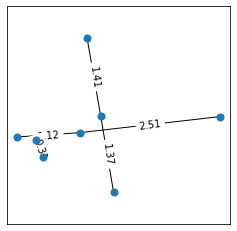

In [3]:
X,Y_true=DataLoader.load('iris')
Y_pred = api.DGSFC.fit( X,
                      K_d=10,
                      K_s=7,
                      alpha=0.4,
                      epsilon=0,
                      plot=True,
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## wine

,f1,ARI,ACC,cover_rate
0,0.815888,0.553225,0.820225,1.0


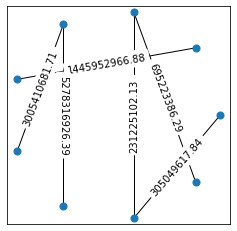

In [4]:
X,Y_true=DataLoader.load('wine')

Y_pred = api.DGSFC.fit( X,
                      K_d=20,
                      K_s=10,
                      alpha=0.3,
                      epsilon=0,
                      plot=True,
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## 	Breast Cancer Wisconsin

,f1,ARI,ACC,cover_rate
0,0.864759,0.61026,0.829525,1.0


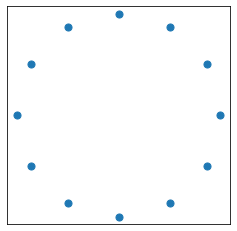

In [5]:
X,Y_true=DataLoader.load('breast cancer')

Y_pred = api.DGSFC.fit( X,
                      K_d=100,
                      K_s=80,
                      alpha=1,
                      epsilon=0,
                      plot=True,
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

## glass

In [6]:
X,Y_true=DataLoader.load('glass')

Y_pred= api.DGSFC.fit( X,
                      K_d=10,
                      K_s=15,
                      alpha=1,
                      epsilon=0.002,
                      plot=False,
                     )
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.575886,0.214651,0.512658,0.738318


## Hepatitis

,f1,ARI,ACC,cover_rate
0,0.732209,0.395762,0.746753,1.0


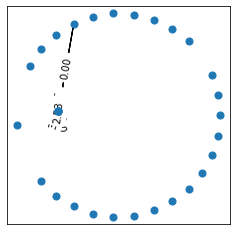

In [7]:
X,Y_true=DataLoader.load('hepatitis')

Y_pred = api.DGSFC.fit( X,
                      K_d=20,
                      K_s=13,
                      alpha=0,
                      epsilon=0,
                      plot=True,
                     )

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

# HDBSCAN

In [3]:
import hdbscan

## iris

In [4]:
X,Y_true=DataLoader.load('iris')

clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=20, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.571521,0.575946,0.680272,0.98


## wine

In [7]:
X,Y_true=DataLoader.load('wine')

clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=2, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.543453,0.30342,0.635294,0.955056


## breast-cancer-wisconsin

In [170]:
X,Y_true=DataLoader.load('breast cancer')

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=10, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result


,f1,ARI,ACC,cover_rate
0,0.784798,0.404075,0.816017,0.811951


## glass

In [181]:
X,Y_true=DataLoader.load('glass')

clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.508276,0.237341,0.578947,0.71028


## hepatitis

In [13]:
X,Y_true=DataLoader.load('hepatitis')

clusterer = hdbscan.HDBSCAN(min_cluster_size=4, min_samples=2, gen_min_span_tree=True)
clusterer.fit(X)
Y_pred=clusterer.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.707275,0.050643,0.765517,0.941558


# mean-shift

In [17]:
from sklearn.cluster import MeanShift, estimate_bandwidth

## iris

In [232]:
X,Y_true=DataLoader.load('iris')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.748276,0.561344,0.655172,0.773333


## wine

In [235]:
X,Y_true=DataLoader.load('wine')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.461323,0.165027,0.359477,0.859551


## breast cancer

In [180]:
X,Y_true=DataLoader.load('breast cancer')
bandwidth = estimate_bandwidth(X, quantile=0.4, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.856856,0.559464,0.855787,0.926186


## glass

In [141]:
X,Y_true=DataLoader.load('glass')
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.381152,0.295403,0.473118,0.869159


## hepatitis

In [26]:
X,Y_true=DataLoader.load('hepatitis')
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=300)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X)
Y_pred = ms.labels_
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.662456,0.080733,0.624,0.811688


# OPTICS

In [28]:
from sklearn.cluster import OPTICS

## iris

In [18]:
X,Y_true=DataLoader.load('iris')
clustering = OPTICS(min_samples=3,min_cluster_size=3).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/cluster/_optics.py:804: RuntimeWarning:

divide by zero encountered in true_divide



,f1,ARI,ACC,cover_rate
0,0.448852,0.119316,0.306452,0.413333


## wine

In [38]:
X,Y_true=DataLoader.load('wine')
clustering = OPTICS(min_samples=2,min_cluster_size=12).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.522303,0.14462,0.402439,0.460674


## breast cancer

In [175]:
X,Y_true=DataLoader.load('breast cancer')
clustering = OPTICS(min_samples=2,min_cluster_size=10).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.441327,0.106331,0.28972,0.376098


## glass

In [99]:
X,Y_true=DataLoader.load('glass')
clustering = OPTICS(min_samples=3,min_cluster_size=8).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.403955,0.334449,0.465649,0.61215


## hepatitis

In [40]:
X,Y_true=DataLoader.load('hepatitis')
clustering = OPTICS(min_samples=2,min_cluster_size=2).fit(X)
Y_pred=clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.104099,-0.017497,0.056604,0.688312


# spectral clustering

In [41]:
from sklearn.cluster import SpectralClustering

## iris

In [42]:
X,Y_true=DataLoader.load('iris')

clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.898775,0.743683,0.9,1.0


## wine

In [271]:
X,Y_true=DataLoader.load('wine')

clustering = SpectralClustering(n_clusters=3,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



,f1,ARI,ACC,cover_rate
0,0.328661,-0.000873,0.359551,1.0


## breast cancer

In [171]:
X,Y_true=DataLoader.load('breast cancer')

clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/cluster/_spectral.py:100: RuntimeWarning:

invalid value encountered in true_divide



,f1,ARI,ACC,cover_rate
0,0.483775,0.0,0.627417,1.0


## glass

In [128]:
X,Y_true=DataLoader.load('glass')

clustering = SpectralClustering(n_clusters=6,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.384259,0.208249,0.485981,1.0


## hepatitis

In [43]:
X,Y_true=DataLoader.load('hepatitis')

clustering = SpectralClustering(n_clusters=2,
        assign_labels="discretize",
        random_state=0,
        affinity='rbf',#'nearest_neighbors',
        ).fit(X)
Y_pred = clustering.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

/usr/data/software/anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



,f1,ARI,ACC,cover_rate
0,0.564778,-0.004232,0.519481,1.0


# k-means

In [44]:
from sklearn.cluster import KMeans

## iris

In [45]:
X,Y_true=DataLoader.load('iris')
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.891775,0.730238,0.893333,1.0


## wine

In [46]:
X,Y_true=DataLoader.load('wine')
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.71478,0.371114,0.702247,1.0


## breast cancer

In [47]:
X,Y_true=DataLoader.load('breast cancer')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.844337,0.491425,0.85413,1.0


## glass

In [316]:
X,Y_true=DataLoader.load('glass')
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.50734,0.271625,0.542056,1.0


## hepatitis

In [48]:
X,Y_true=DataLoader.load('hepatitis')
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
Y_pred = kmeans.labels_

Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.704962,0.019064,0.74026,1.0


# QuickshiftPP

In [4]:
from QuickshiftPP import *

/usr/data/software/Anaconda/envs/ML/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## iris

In [5]:
X,Y_true=DataLoader.load('iris')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=10,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.800757,0.559107,0.78,1.0


## wine

In [6]:
X,Y_true=DataLoader.load('wine')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.728703,0.394124,0.719101,1.0


## breast cancer

In [7]:
X,Y_true=DataLoader.load('wine')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.728703,0.394124,0.719101,1.0


## glass

In [8]:
X,Y_true=DataLoader.load('glass')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=20,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.359452,0.263501,0.481308,1.0


## hepatitis

In [9]:
X,Y_true=DataLoader.load('hepatitis')
X=[X[i] for i in range(X.shape[0])]
model = QuickshiftPP(k=15,beta=0.5)
model.fit(X)
Y_pred = model.memberships
Y_pred,Y_true=matchY(Y_pred,Y_true)
result=measures_calculator(Y_true,Y_pred)
result

,f1,ARI,ACC,cover_rate
0,0.70832,0.015719,0.785714,1.0
